In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)

# Sharpening Filters: First Derivative, Second Derivative, Laplacian (Isotropic and Rotation Invariant)

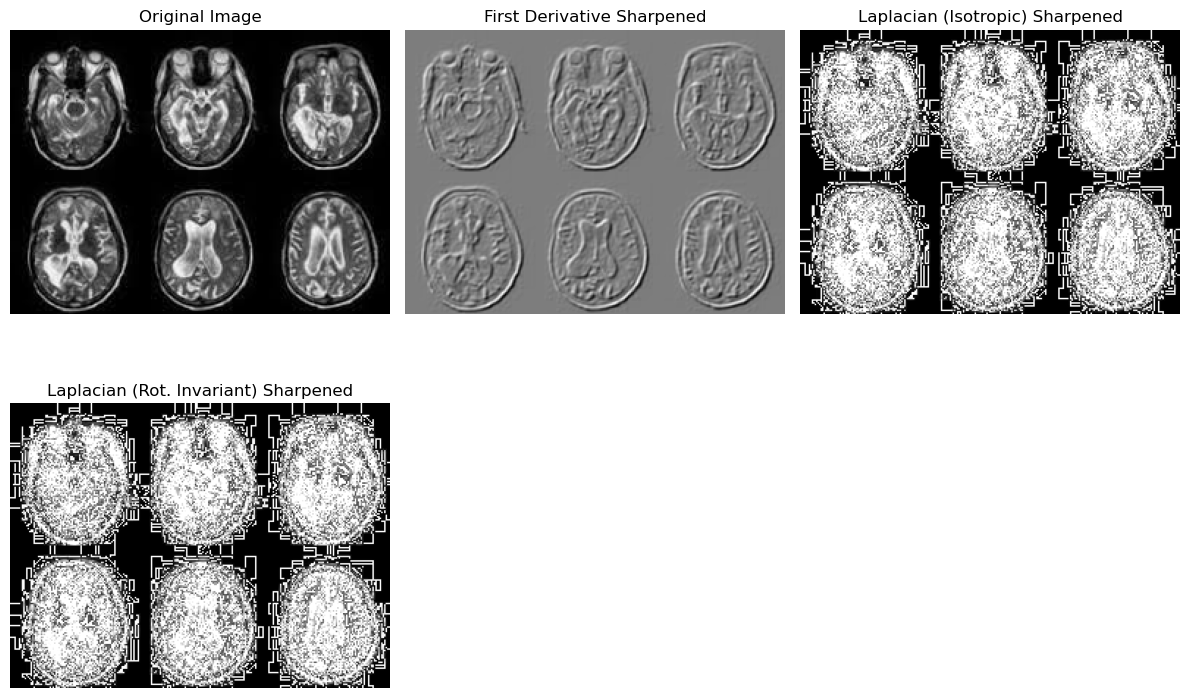

In [31]:

# Sharpening using first derivative (Prewitt filter)
prewitt_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
prewitt_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
first_derivative_sharpened = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

# Sharpening using Laplacian filter (Isotropic)
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

# Convert both images to uint8 before adding them
laplacian = np.uint8(laplacian)
image = np.uint8(image)

laplacian_sharpened = cv2.addWeighted(image, 1, laplacian, 1, 0)

# Sharpening using Laplacian filter (Rotation Invariant)
laplacian_rot_inv = cv2.Laplacian(image, cv2.CV_64F, ksize=3, delta=0, scale=1, borderType=cv2.BORDER_DEFAULT)
laplacian_rot_inv = np.uint8(laplacian_rot_inv)  # Convert to uint8 for compatibility
laplacian_rot_inv_sharpened = cv2.addWeighted(image, 1, laplacian_rot_inv, 1, 0)

# Display the original and sharpened images using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(first_derivative_sharpened, cmap='gray')
plt.title('First Derivative Sharpened')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(laplacian_sharpened, cmap='gray')
plt.title('Laplacian (Isotropic) Sharpened')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(laplacian_rot_inv_sharpened, cmap='gray')
plt.title('Laplacian (Rot. Invariant) Sharpened')
plt.axis('off')

plt.tight_layout()
plt.show()


# Unsharp Masking and High-Boost Filtering

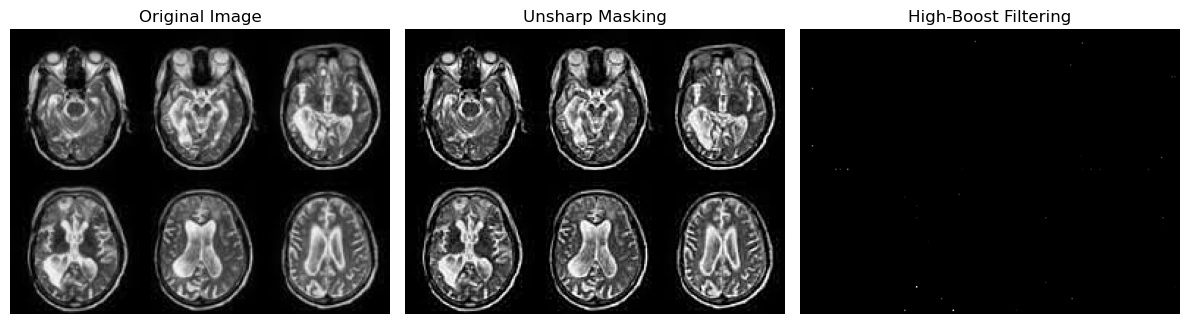

In [35]:
image = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded correctly. Please check the file path and loading process.")
else:
    # Apply Gaussian blur to the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Unsharp masking
    unsharp_mask = cv2.addWeighted(image, 2, blurred, -1, 0)

    # High-boost filtering
    k = 1.5  # Adjust the boost factor
    highboost_kernel = np.array([[-1, -1, -1],
                                 [-1, k, -1],
                                 [-1, -1, -1]])
    highboost_filtered = cv2.filter2D(image, -1, highboost_kernel)

    # Display the original, unsharp-masked, and high-boost filtered images
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(unsharp_mask, cmap='gray')
    plt.title('Unsharp Masking')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(highboost_filtered, cmap='gray')
    plt.title('High-Boost Filtering')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
